In [1]:
import pickle
import shutil
import rasterio
import geopandas
import numpy as np
from os import listdir
from pathlib import Path
import matplotlib.pyplot as plt
from shapely.geometry import shape

#%matplotlib notebook
%matplotlib inline

# Visualize the geometry

In [ ]:
with open("files_metadata.pickle", "rb") as metadata_file:
    products_metadata = pickle.load(metadata_file)        

In [ ]:
_gd = {'productId':[], 'geometry':[]}
for p in products_metadata[0:1]:
    _gd['productId'].append(p['productId'])
    _gd['geometry'].append(shape(p['geometry']['geometries'][0]))
    
_gd

In [ ]:
gdf = geopandas.GeoDataFrame(_gd)

gdf.plot(alpha=0.25, edgecolor='red', legend=True, column='productId', 
         legend_kwds={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, 
         figsize=(24,16));

## Visualize the images 

In [6]:
datapath = Path("/shared_volume/tif_zip")
datapath_unzipped = Path("/shared_volume/tif_test")
datapath_png = Path("/shared_volume/png")

Loading the files

In [7]:
zipped_data_files = [datapath.joinpath(f) for f in listdir(datapath) if datapath.joinpath(f).exists() and ".tif.zip" in f]
zipped_data_files[0:5]

[PosixPath('/shared_volume/tif_zip/P03_002029_2077_XN_27N229W.tif.zip'),
 PosixPath('/shared_volume/tif_zip/P01_001435_2280_XI_48N226W.tif.zip'),
 PosixPath('/shared_volume/tif_zip/P02_001893_2485_XI_68N126W.tif.zip'),
 PosixPath('/shared_volume/tif_zip/P02_001886_2049_XI_24N285W.tif.zip'),
 PosixPath('/shared_volume/tif_zip/P01_001414_1780_XI_02S005W.tif.zip')]

In [8]:
def display_image(zipped_data_file, datapath_unzipped, freemem=False):  
    
    unzipped_datafile = datapath_unzipped.joinpath(zipped_data_file.stem)
    unzipped_datafile_png = datapath_png.joinpath(zipped_data_file.stem).with_suffix(".png")
    
    if not unzipped_datafile.exists():
        print(f"Unzipping {zipped_data_file}..")
        shutil.unpack_archive(zipped_data_file, datapath_unzipped)
        print("")
    else:
        print(f"Unzipped file already exists: {unzipped_datafile}")
        
    with rasterio.open(unzipped_datafile) as tif:
        img = tif.read(1)
        img[img<=tif.nodata] = np.nan

    fig, ax = plt.subplots(figsize=(8,16))
    plt.imshow(img, cmap = 'viridis')
    plt.colorbar()    
    
    if not unzipped_datafile_png.exists():
        fig.savefig(unzipped_datafile_png, dpi=300)
    else:
        print(f"Png file already exists: {unzipped_datafile_png}")
    
    if freemem:
        fig.clear()
        plt.close(fig)


<b>When a cell tells matplotlib to draw an inline figure, when the cell is executed and the image is drawn, some memory is not released..unless calling clear and close..</b>

In [12]:
%matplotlib notebook

Unzipped file already exists: /shared_volume/tif_test/P03_002029_2077_XN_27N229W.tif


<IPython.core.display.Javascript object>


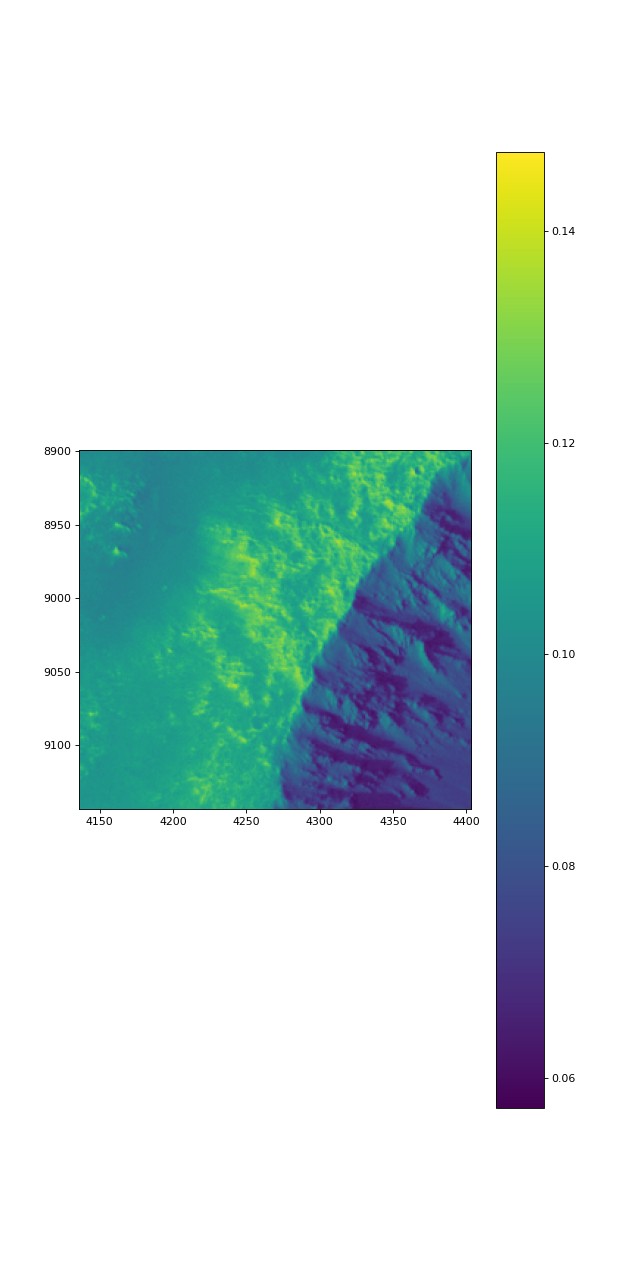

Png file already exists: /shared_volume/png/P03_002029_2077_XN_27N229W.png


In [13]:
display_image(zipped_data_files[0], datapath_unzipped)

In [ ]:
# To save all png 
for zdf in zipped_data_files:
    display_image(zdf, datapath_unzipped, freemem=True)